In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


medical_df = pd.read_csv('../../data/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

## Лінійна регресія з використанням кількох характеристик (множинна лінійна регресія)

До цього моменту ми використовували лише характеристику `age` для оцінки `charges`. Додавання іншої характеристики, наприклад `bmi`, є досить простим. Ми просто припускаємо наступну залежність:

$charges = \theta_0 + \theta_1 \times age + \theta_2 \times bmi$

Нам потрібно змінити лише один рядок коду, щоб включити індекс маси тіла і натренувати регресію з sklearn.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Визначаємо вхідні дані і таргет
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(inputs, targets)

# Робимо передбачення моделлю
predictions = model.predict(inputs)

# Разуємо лосс
loss = root_mean_squared_error(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [4]:
# Пригадаємо точність передбачення лише на віці
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']
model_one_regressor = LinearRegression().fit(inputs, targets)
predictions_one_regressor = model_one_regressor.predict(inputs)
loss_one_regressor = mean_squared_error(targets, predictions_one_regressor, squared=False)
print('Loss:', loss_one_regressor)

Loss: 4662.505766636395


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Бачимо, що додавання ІМТ не зменшило значно втрати, оскільки ІМТ має дуже слабку кореляцію зі зборами, особливо для некурців (це ми могли б зʼясувати також на EDA):

In [5]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

In [6]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Ми також можемо візуалізувати взаємозв'язок між усіма 3 змінними "вік", "індекс маси тіла" та "збори" за допомогою 3D діаграми розсіювання.

In [7]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

Ви можете побачити, що інтерпретувати 3D діаграму розсіювання складніше, ніж 2D діаграму розсіювання. Як тільки ми додаємо більше характеристик, стає неможливим візуалізувати всі характеристики одночасно, через це ми використовуємо такі кількісні міри, як кореляція та втрати.

Також давайте перевіримо параметри моделі.

In [8]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [9]:
model.feature_names_in_

array(['age', 'bmi'], dtype=object)

# Інтерпретація коефіцієнтів лінійної регресії

Коефіцієнти регресії в машинному навчанні інтерпретуються як показники впливу незалежних змінних (предикторів) на залежну змінну в рамках регресійної моделі. Як саме ми інтерпретуємо коефіцієнти - розглянемо далі.

### Проста лінійна регресія

Модель простої лінійної регресії як ми памʼятаємо, виглядає так:
$$ y = \theta_0 + \theta_1 x + \epsilon $$

де:
- $ y $ — залежна змінна,
- $ x $ — незалежна змінна,
- $ \theta_0 $ — вільний член (константа),
- $ \theta_1 $ — коефіцієнт регресії,
- $ \epsilon $ — випадкова похибка.

**Інтерпретація:**
- **$ \theta_0 $**: це значення залежної змінної $ y $, коли незалежна змінна $ x $ дорівнює нулю. Це точка перетину з віссю $ y $.
- **$ \theta_1 $**: це зміна залежної змінної $ y $ при зміні незалежної змінної $ x $ на одну одиницю. Якщо $ \theta_1 $ позитивний, $ y $ зростає зі зростанням $ x $; якщо негативний — $ y $ зменшується зі зростанням $ x $.

### Множинна лінійна регресія

Модель множинної лінійної регресії:
$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n + \epsilon $$

де:
- $ y $ — залежна змінна,
- $ x_1, x_2, \ldots, x_n $ — незалежні змінні,
- $ \theta_0 $ — вільний член (константа),
- $ \theta_1, \theta_2, \ldots, \theta_n $ — коефіцієнти регресії для кожної незалежної змінної,
- $ \epsilon $ — випадкова похибка.

**Інтерпретація:**
- **$ \theta_0 $**: це значення залежної змінної $ y $, коли всі незалежні змінні $ x_1, x_2, \ldots, x_n $ дорівнюють нулю.
- **$ \theta_i $** (де $ i = 1, 2, \ldots, n $): це зміна залежної змінної $ y $ при зміні незалежної змінної $ x_i $ на одну одиницю за умови, що всі інші незалежні змінні залишаються незмінними. Це називається частковим ефектом або парціальним коефіцієнтом.

### Приклад

Припустимо, у нас є модель:
$$ y = 3 + 2x_1 - 4x_2 + \epsilon $$

**Інтерпретація:**
- **$ \theta_0 = 3 $**: коли $ x_1 $ та $ x_2 $ дорівнюють нулю, очікуване значення $ y $ дорівнює 3.
- **$ \theta_1 = 2 $**: при збільшенні $ x_1 $ на одну одиницю, очікуване значення $ y $ збільшується на 2 одиниці за умови, що $ x_2 $ залишається незмінним.
- **$ \theta_2 = -4 $**: при збільшенні $ x_2 $ на одну одиницю, очікуване значення $ y $ зменшується на 4 одиниці за умови, що $ x_1 $ залишається незмінним.

В нашому випадку коли коефіцієнти є наступними:



In [ ]:
model.coef_, model.intercept_, model.feature_names_in_

(array([266.87657817,   7.07547666]),
 -2293.6320906488727,
 array(['age', 'bmi'], dtype=object))

 Відповідно за `age`, `bmi` рівні 0 `charges` будуть рівні -2293.63, і якщо `age` змінюється на 1, то `charges` збільшуються на 266, а коли `bmi` збільшується на 1, то `charges` збільшуються на 7. З цього маємо інформацію, що чим вищий вік та ІМТ - тим вищі збори, що логічно.

Можемо також оцінити мінімальний розмір `charges`, який може надати модель взявши мінімальні значення `age`, `bmi` з набору даних та можемо порівняти зі справжнім мінімальним значенням `charges`:

In [10]:
non_smoker_df[['age', 'bmi']].min()

age    18.00
bmi    15.96
dtype: float64

In [11]:
model.intercept_ + np.dot(model.coef_, non_smoker_df[['age', 'bmi']].min())

2623.070923803042

In [12]:
non_smoker_df[['charges']].min()

charges    1121.8739
dtype: float64

Коефіцієнти також можуть бути зручним способом оцінити вплив кожної незалежнох змінної на залежну, але для цього нам треба зробити деяке перетворення даних - масштабування ознак, про яке поговоримо далі.

# Cтат значимість коефіцієнтів регресії

Стат значимість і інші статистичні показники про модель можемо отримати з іншого методу для навчання лін регресії - з бібліотеки `statsmodels`. Більше інформації - тут https://www.statsmodels.org/dev/gettingstarted.html

In [13]:
import statsmodels.api as sm

Y = targets
X = inputs
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params



const   -2091.420557
age       267.248913
dtype: float64

Бачимо, що параметри отримали ті самі, що з sklearn.
Але тут є ще важливий репорт:

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     691.4
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          9.17e-118
Time:                        14:05:29   Log-Likelihood:                -10498.
No. Observations:                1064   AIC:                         2.100e+04
Df Residuals:                    1062   BIC:                         2.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2091.4206    425.102     -4.920      0.0

Як читати і зрозуміти звіт

## Основна інформація
- **Залежна змінна**: `charges` (показує залежність витрат від віку та індексу маси тіла (BMI)).
- **Модель**: OLS (Метод найменших квадратів).
- **Кількість спостережень**: 1064
- **Кількість параметрів моделі**: 2 (age і bmi)
- **R-квадрат**: 0.394 (модель пояснює 39.4% варіації у залежній змінній)
- **Adj. R-квадрат**: 0.393 (скоригований R-квадрат)
- **F-статистика**: 345.4 (модель в цілому значуща, оскільки p-значення дуже маленьке)
- **Log-правдоподібність**: -10498
- **AIC**: 21000
- **BIC**: 21020

### F-статистика

**F-статистика** (F-statistic) використовується для перевірки загальної значущості моделі регресії. Вона порівнює модель, яка включає незалежні змінні, з моделлю, яка містить лише константу (тобто, без змінних-предикторів).

- **Просто**: Це тест, який показує, наскільки добре ваша модель з усіма змінними пояснює залежну змінну у порівнянні з моделлю, яка не містить жодної змінної (лише середнє значення).
- **Високе значення F-статистики та мале p-значення**: означає, що ваша модель є значущою і незалежні змінні суттєво покращують пояснення залежної змінної.

### Log-правдоподібність

**Log-правдоподібність** (Log-Likelihood) оцінює, наскільки ймовірно, що дані, які ви спостерігаєте, відповідають параметрам моделі.

- **Просто**: Це міра того, наскільки добре модель відповідає даним. Вища лог-правдоподібність означає, що модель краще підходить до даних.
- **Застосування**: Використовується для порівняння різних моделей, де вища лог-правдоподібність означає кращу модель.

### AIC (Критерій Акаіке)

**AIC** (Akaike Information Criterion) оцінює модель з точки зору її точності та складності. Він балансує між якістю підгонки моделі і кількістю параметрів.

- **Просто**: Це міра того, наскільки добре модель підходить до даних з урахуванням кількості параметрів. Менше значення AIC означає кращу модель.
- **Формула**: AIC = 2k - 2 * log-правдоподібність (де k — кількість параметрів моделі).

### BIC (Байєсівський інформаційний критерій)

**BIC** (Bayesian Information Criterion) схожий на AIC, але включає сильніший штраф за кількість параметрів моделі.

- **Просто**: Як і AIC, BIC також оцінює модель з урахуванням якості підгонки і складності. Менше значення BIC означає кращу модель. Однак, BIC більш суворо штрафує за додавання зайвих параметрів.
- **Формула**: BIC = log(n) * k - 2 * log-правдоподібність (де n — кількість спостережень, k — кількість параметрів моделі).

## Коефіцієнти
Для перевірки статистичної значущості коефіцієнтів використовується **t-тест**, який перевіряє нульову гіпотезу про те, що коефіцієнт регресії для змінної дорівнює нулю (тобто, що змінна не має значного впливу на залежну змінну).

Формула t-статистики для кожного коефіцієнта виглядає так:
$$ t = \frac{\hat{\theta}_j}{SE(\hat{\theta}_j)} $$
де:
- $\hat{\theta}_j$ — оцінка коефіцієнта для змінної $j$,
- $SE(\hat{\theta}_j)$ — стандартна помилка для цього коефіцієнта.

**Інтерпретація результатів**

- **t-статистика**: Високе значення t-статистики (як за додатні, так і за від'ємні значення) свідчить про те, що коефіцієнт є значущим.
- **P-значення (P>|t|)**: Це ймовірність спостерігати таке t-значення (або більше екстремальне) за умови, що нульова гіпотеза правильна.
  - **Мале p-значення (зазвичай менше 0.05)**: Вказує на те, що коефіцієнт є статистично значущим, тобто змінна має значний вплив на залежну змінну.
  - **Високе p-значення (більше 0.05)**: Вказує на те, що немає достатньо доказів відхилити нульову гіпотезу, тобто змінна не є значущою в моделі.

**Застосування до нашого звіту**

- **Коефіцієнт для віку (age)**: t-статистика = 26.048, p-значення = 0.000 (значуща змінна).
- **Коефіцієнт для BMI**: t-статистика = 0.296, p-значення = 0.767 (незначуща змінна).
- **Константа (const)**: t-статистика = -2.853, p-значення = 0.004 (значуща змінна).


---------

# Продовження вдосконалення моделі шляхом додавання ознак

Давайте продовжимо вдосконалювати модель, зробимо ще один крок вперед і додамо останню числову колонку: "діти", яка, здається, має деяку кореляцію з "зборами".

$charges = \theta_0 + \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children$

In [15]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

Розглянемо ще один цікавий графік з plotly для аналізу:

In [16]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

Створюємо модель

In [17]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions, squared=False)
  print('Loss:', loss)
  return model

In [18]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
train_model_show_rmse(inputs, targets)

Loss: 4608.470405038246


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



LinearRegression()

Ще раз, ми не бачимо великого зменшення втрат, хоча воно більше, ніж у випадку з ІМТ.

А якщо ми зробимо те саме, але для всіх клієнтів, втрати будуть нижчі чи вищі?

In [19]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
train_model_show_rmse(inputs, targets)

Loss: 11355.317901125973


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



LinearRegression()

Втрати збільшились, бо більше клієнтів - більше різноманіття і наша проста модель гірше справляється з задачею апроксимації.

# Використання категоріальних ознак в моделі ML

До цього моменту ми використовували лише числові стовпці, оскільки ми можемо виконувати обчислення лише з числами. Якщо б ми могли використовувати категоріальні стовпці, як "smoker", ми могли б навчити модель на всьому наборі даних.

Щоб використовувати категоріальні стовпці, нам просто потрібно перетворити їх на числа. Існує три поширені техніки для цього:

1. Якщо категоріальний стовпець має лише дві категорії (його називають бінарною категорією), то ми можемо замінити їх значення на 0 і 1.
2. Якщо категоріальний стовпець має більше ніж 2 категорії, ми можемо виконати **one-hot encoding**, тобто створити новий стовпець для кожної категорії з 1 та 0.
3. Якщо категорії мають природний порядок (наприклад, холодно, нейтрально, тепло, гаряче), то вони можуть бути перетворені на числа (наприклад, 1, 2, 3, 4), зберігаючи порядок. Їх називають порядковими числами - order numbers.

## Бінарні категорії

Категорія `smoker` має лише два значення "так" та "ні". Створимо нову колонку `smoker_code`, де 0 відповідає "ні", а 1 - "так".

In [ ]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

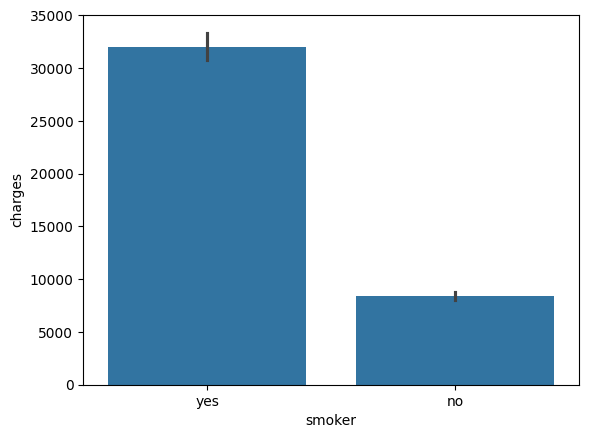

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


Тепер ми можемо використовувати стовпець `smoker_df` для лінійної регресії.

$charges = \theta_0 + \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children + \theta_4 \times smoker$

In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
train_model_show_rmse(inputs, targets)

Loss: 6056.439217188081


LinearRegression()

Втрати зменшилися з `11355` до `6056`, майже на 50%! Це важливий урок: ніколи не ігноруйте категоріальні дані.

Спробуємо додати стовпець `sex`.

$charges = \theta_0 + \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children + \theta_4 \times smoker + \theta_5 \times sex$

<Axes: xlabel='sex', ylabel='charges'>

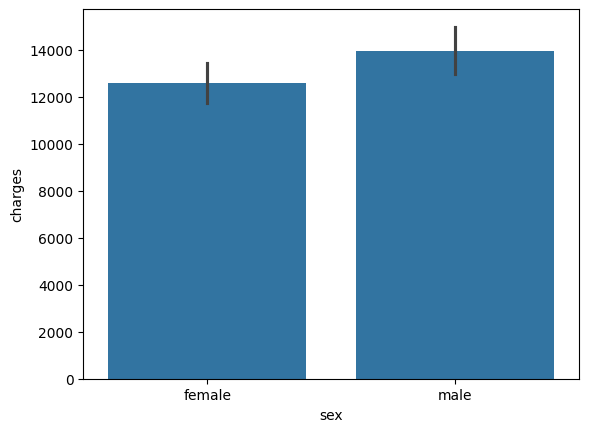

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
train_model_show_rmse(inputs, targets)

Loss: 6056.100708754546


LinearRegression()

Як ви могли очікувати, з кореляції, модель не поліпшилась значно.

### One-hot кодування

Стовпець `region` містить 4 значення, тому нам потрібно використовувати One-hot encoding та створити новий стовпець для кожного регіону.

![](https://i.imgur.com/n8GuiOO.png)

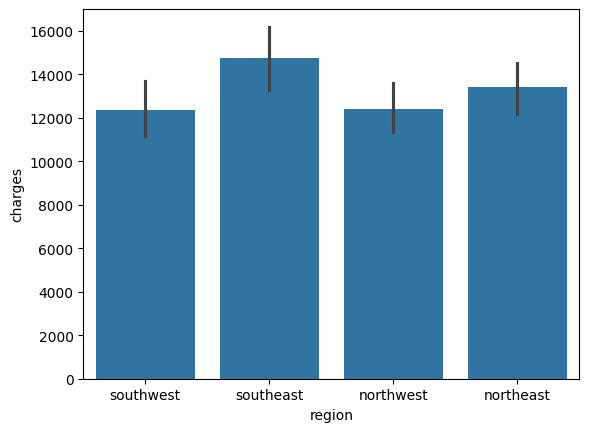

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
enc.categories_[0]

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
medical_df[enc.categories_[0]] = one_hot

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


Давайте включимо стовпці регіону до нашої моделі лінійної регресії.

$charges = \theta_0 +  \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children + \theta_4 \times smoker + \theta_5 \times sex + \theta_6 \times region$

In [ ]:
enc.categories_[0].tolist()

['northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code'] + enc.categories_[0].tolist()
inputs = medical_df[input_cols]
model = train_model_show_rmse(inputs, targets)

Loss: 6041.6796511744515


Ще раз, це призводить до досить невеликого зменшення втрат.

**А ЯК ЖЕ Ж МУЛЬТИКОЛІНЕАНРІСТЬ?**

Коли ми обговорювали МНК (OLS), ми казали, що ознаки не мають бути такими, що одну з них можемо виразити з решти.
За one-hot encoding при використанні всіх категорій ми маємо саме цей кейс, бо сума в рядку завжди дає одиницю.


In [ ]:
medical_df[enc.categories_[0]]

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


В цьому випадку при розвʼязку задачі з МНК у нас детермінант матриці Х = 0 і ми не маємо розвʼязку.
Але! В sklearn метод реалізований так, що він стійкий до мультиколінераності, а градієнтному спуску мультиколінеарність не заважає сходитись, бо функція витрат все одно опукла.

### Стабільність у випадку мультиколінеарності `sklearn.linear_model.LinearRegression`

scikit-learn включає наступні механізми для вирішення проблем мультиколінеарності:

1. **Гребенева регресія (L2-регуляризація)**: Клас `Ridge` у scikit-learn додає регуляризаційний член до функції втрат:
   $$ \text{Loss} = \|\mathbf{y} - \mathbf{X} \mathbf{w}\|_2^2 + \alpha \|\mathbf{w}\|_2^2 $$
   Це допомагає стабілізувати інверсію матриці $\mathbf{X}^T \mathbf{X}$ шляхом додавання штрафу до величини коефіцієнтів, що особливо корисно у випадку мультиколінеарності.

2. **Сингулярне розкладання (SVD)**: scikit-learn використовує SVD для розв'язання нормальних рівнянь. SVD розкладає матрицю $\mathbf{X}$ на компоненти, які можна інвертувати більш стабільно, навіть коли матриця майже сингулярна. Це допомагає пом'якшити числові проблеми, спричинені мультиколінеарністю.

З цими методами познайомимось дещо пізніше.

Щодо градієнтного спуску, як мультиколінеарність впливає на нього, а також як це обійти, можна прочитати тут - https://datascience.stackexchange.com/a/124422.

В академічних навчаннях рекомендують виключати одну з one-hot закодованих категорій. Можна це робити, але на практиці часто це оминають.

До речі, давайте ще переглянемо, що у нас з помилками, чи вони гомоскедастичні і нормальні?



In [ ]:
predictions = model.predict(inputs)

In [ ]:
errors = targets - predictions

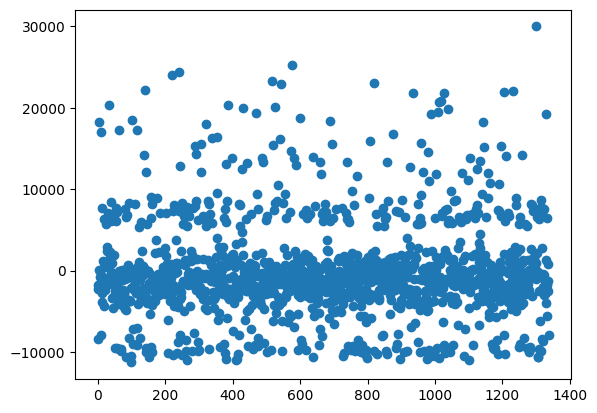

In [ ]:
plt.plot(errors, 'o')

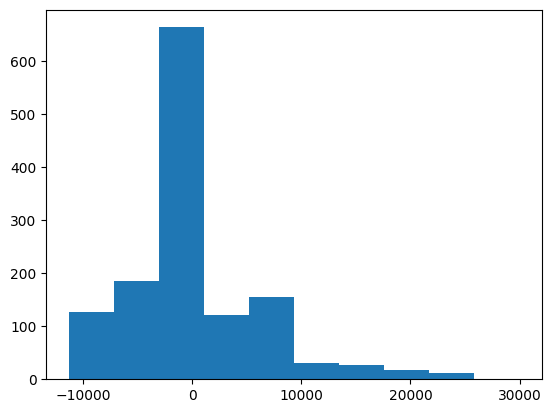

In [ ]:
plt.hist(errors);

Помилки не зовсім нормальні і це означає, що є куди покращувати модель. Є якийсь патерн, що модель помиляється систематично.

Більше про різні підходи кодування категоріальних ознак можна почитати тут
- https://www.kaggle.com/code/srivignesh/categorical-feature-encoding-techniques
- https://kantschants.com/complete-guide-to-encoding-categorical-features

## Удосконалення моделі

Давайте обговоримо та застосуємо деякі додаткові удосконалення нашої моделі.

### Масштабування ознак

Пам'ятайте, що через регулятивні вимоги в задачі (обговорювали на початку розповіді про регресію), нам також потрібно пояснити обґрунтування прогнозів нашої моделі.

$charges = \theta_0 + \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children + \theta_4 \times smoker + \theta_5 \times sex + \theta_6 \times region$

Щоб порівняти важливість кожної ознаки в моделі, наш перший імпульс може бути порівнянням їх ваг.

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
np.append(model.coef_, model.intercept_)

array([   256.85635254,    339.19345361,    475.50054515,  23848.53454191,
         -131.3143594 ,    587.00923503,    234.0453356 ,   -448.01281436,
         -373.04175627, -12525.5478112 ])

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811



# Масштабування ознак (Feature scaling)

Хоча здається, що `bmi` та `northwest` мають вищу вагу, ніж `age`, ми розуміємо, що діапазон значень для `bmi` обмежений (від 15 до 40), а стовпець `northwest` приймає лише значення 0 та 1.

Оскільки різні стовпці мають різні діапазони, ми стикаємося з двома проблемами:

1. Ми не можемо порівняти ваги різних стовпців, щоб визначити, які ознаки є важливими.
2. Стовпець з більшим діапазоном вхідних даних може непропорційно впливати на втрати та домінувати в процесі оптимізації.

З цієї причини стандартною практикою є масштабування значень в числовому стовпці. Масштабування ознак може відбуватись різними способами - найбільш поширені - стандартизація і min-max нормалізація. Масштабування має на меті кілька цілей, але наразі розглянемо саме вплив на інтерпретацію коефіцієнтів.

### Стандартизація

Стандартизація змінних (z-score normalization, stadartization) передбачає перетворення кожної змінної $x_i$ таким чином, щоб вона мала середнє значення 0 та стандартне відхилення 1. Формула для стандартизації:
$$ x_i' = \frac{x_i - \mu_i}{\sigma_i} $$

де:
- $ x_i' $ — стандартизоване значення змінної $ x_i $,
- $ \mu_i $ — середнє значення змінної $ x_i $,
- $ \sigma_i $ — стандартне відхилення змінної $ x_i $.

**Інтерпретація коефіцієнтів після стандартизації:**
- **$ \theta_0 $**: Це значення залежної змінної $ y $ коли всі стандартизовані незалежні змінні $ x_i' $ дорівнюють нулю. Оскільки всі змінні мають середнє значення 0, $ \theta_0 $ представляє середнє значення $ y $.
- **$ \theta_i $**: Це зміна залежної змінної $ y $ при зміні стандартизованої незалежної змінної $ x_i' $ на одну одиницю. Оскільки змінні стандартизовані, це означає зміну $ y $ на одну стандартну девіацію $ x_i $. Іншими словами, це стандартні коефіцієнти (standardized coefficients), які показують, як багато стандартних девіацій змінюється $ y $ при зміні $ x_i $ на одну стандартну девіацію.

###  Min-max нормалізація

Нормалізація методом мін-макс передбачає перетворення кожної змінної $ x_i $ таким чином, щоб її значення були в діапазоні від 0 до 1. Формула для нормалізації:
$$ x_i' = \frac{x_i - \min(x_i)}{\max(x_i) - \min(x_i)} $$

де:
- $ x_i' $ — нормалізоване значення змінної $ x_i $,
- $ \min(x_i) $ — мінімальне значення змінної $ x_i $,
- $ \max(x_i) $ — максимальне значення змінної $ x_i $.

**Інтерпретація коефіцієнтів після нормалізації:**
- **$ \theta_0 $**: Це значення залежної змінної $ y $ коли всі нормалізовані незалежні змінні $ x_i' $ дорівнюють нулю. Інтерпретація схожа на початкову модель, але з урахуванням того, що $ x_i $ були перетворені в діапазон від 0 до 1.
- **$ \theta_i $**: Це зміна залежної змінної $ y $ при зміні нормалізованої незалежної змінної $ x_i' $ на одну одиницю. Оскільки змінні нормалізовані, одна одиниця зміни $ x_i' $ відповідає зміні $ x_i $ від мінімального до максимального значення. Таким чином, $ \theta_i $ показує, наскільки змінюється $ y $ при зміні $ x_i $ від мінімального до максимального значення.


Тож, після стандартизації коефіцієнти $\theta$ інтерпретуються як зміна залежної змінної $ y $ при зміні незалежної змінної на одну стандартну девіацію. Після нормалізації (мін-макс) коефіцієнти $\theta$ показують зміну залежної змінної $ y $ при зміні незалежної змінної від її мінімального до максимального значення. В обох випадках масштаб змінних змінюється, що впливає на інтерпретацію величини ефекту, але не на напрямок (збільшується чи зменшується).

Ми можемо імплементувати масштабування за допомогою методів `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

toy_df = pd.DataFrame({
    'Normal': np.random.normal(100, 50, 1000),
    'Exponential': np.random.exponential(25, 1000),
    'Uniform': np.random.uniform(-250, -50, 1000)
})

In [ ]:
def plot_scaling_result(data, scaled_data, scaling_title, x_lim=(-5, 5)):
    scaled_df = pd.DataFrame(
      scaled_data,
      columns=['Normal', 'Exponential', 'Uniform']
    )

    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.set_xlim((-300, 300))
    ax1.set_title('No Scaling')
    sns.kdeplot(data.Normal, ax=ax1, label='Normal')
    sns.kdeplot(data.Exponential, ax=ax1, label='Exponential')
    sns.kdeplot(data.Uniform, ax=ax1, label='Uniform')

    ax2.set_xlim(x_lim)
    ax2.set_title(scaling_title)
    sns.kdeplot(scaled_df.Normal, ax=ax2, label='Normal')
    sns.kdeplot(scaled_df.Exponential, ax=ax2, label='Exponential')
    sns.kdeplot(scaled_df.Uniform, ax=ax2, label='Uniform')
    plt.legend();

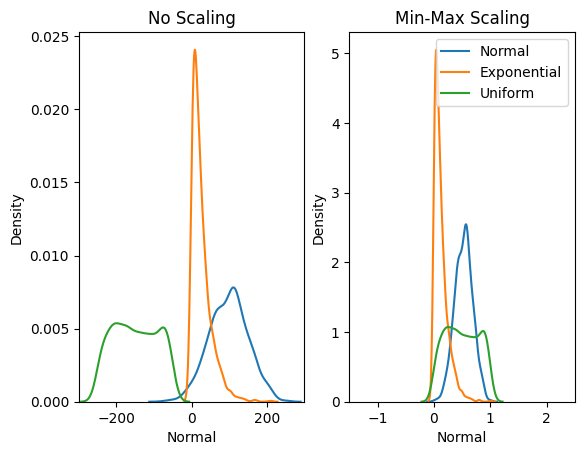

In [ ]:
min_max_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(toy_df)
plot_scaling_result(toy_df, min_max_scaled, 'Min-Max Scaling', (-1.5, 2.5))

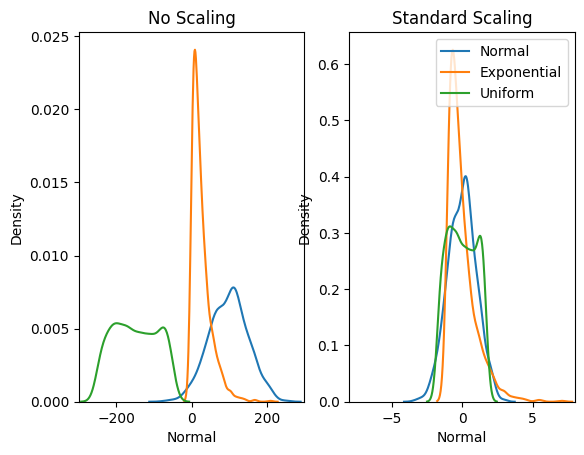

In [ ]:
std_scaled = StandardScaler().fit_transform(toy_df)
plot_scaling_result(toy_df, std_scaled, 'Standard Scaling', (-8, 8))

Розглянемо як використати масштабування ознак на нашій задачі і як це вплине на інтерпретацію коефіцієнтів:

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

Ми можемо масштабувати дані наступним чином:

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

,0,1,2
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


Ці дані тепер можна поєднати з категоріальними даними.

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = train_model_show_rmse(inputs, targets)

Loss: 6041.6796511744515


In [ ]:
column_names = numeric_cols + cat_cols

In [ ]:
inputs_df = pd.DataFrame(inputs, columns=column_names)
inputs_df

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.0,1.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,0.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,0.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,0.0,0.0,0.0,0.0,0.0,1.0


Ми тепер можемо порівняти ваги в формулі:

$charges = \theta_1 \times age + \theta_2 \times bmi + \theta_3 \times children + \theta_4 \times smoker + \theta_5 \times sex + \theta_6 \times region + b$

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Як ви можете бачити зараз, найважливіші характеристики є:

1. smoker
2. age
3. bmi

### Вплив масштабування ознак на сходження градієнтного спуску

Масштабування ознак також допомагає градієнтному спуску легше і швидше сходитись завдяки тому, що фукнція втрат стає однаковою з усіх сторін, без витягнення в один з боків - що погано для сходження алгоритму

![](https://miro.medium.com/v2/resize:fit:876/1*dGXqtJOKa_Tbvt9nL3H7KQ.jpeg)

Найчастіше тут використовують Min-Max нормалізацію. Тож, якщо у Вас не сходиться градієнтний спуск - масштабування ознак може допомогти.

### Створення тестового набору

Моделі, подібні до тієї, що ми створили, призначені для використання в реальному світі. Для цього нам треба перевірити, як буде працювати модель на даних, які вона не бачила.

Зазвичай прийнято відкладати невелику частину даних (наприклад, 10%) для тестування та фіксації результатів моделі на нових даних.

Все це теж можемо зробити з допомогою `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
? train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1, random_state=12)

In [ ]:
model = LinearRegression().fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
loss = mean_squared_error(targets_test, predictions_test, squared=False)
print('Test Loss:', loss)

Test Loss: 7138.137472125071


Порівняймо це з втратами під час тренування.

In [ ]:
predictions_train = model.predict(inputs_train)
loss = mean_squared_error(targets_train, predictions_train, squared=False)
print('Training Loss:', loss)

Training Loss: 5910.560543481324


Чи можете ви пояснити, чому втрати під час тренування нижчі, ніж втрати під час тестування?
## Розбиття train/validation/test
- Train: для навчання моделі
- Validation/Evaluation/Dev Set: тюнінг гіперпараметрів, вибір найкращої моделі
- Test: для перевірки якості фінальної моделі

![](https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg)

## Як розбивати
Якщо кількість тренувальних екземплярів < 100 000, то:
- розбиваємо набір даних на train/test у співвідношенні 80/20
- розбиваємо full train на train subset/validation теж у співвідношенні 80/20
- також можна ділити train/test у співвідношенні 70/30 або ділити train subset/val/test у співвідношенні 60/20/20 або пропорції 80/10/10.

Вибирати варіант розбиття можна з цільової метрики на train set.

Якшо кількість екземплярів у навчанні значно більша за 100 000 (починаючи з 1 млн):
- розбиваємо набір даних на train subset/val/test у співвідношенні 99/1/1, тому що й так буде достатньо даних для тестування, а з іншого боку ми забезпечуємо максимальну різноманітність прикладів у тренувальному наборі даних.

## Що важливо врахувати при розбитті даних на піднабори


1. Переконатися, що піднабори train subset/ val /test мають однаковий розподіл даних, насамперед цільової змінної, але також можна перевірити ознаки.

2. Переконатися, що розбиття можна відтворити (ми зафіксували метод розбиття, наприклад, зафіксувавши random seed)

3. Часто зручно для подальшої роботи розбити на піднабори індекси даних, зберегти їх і потім за ними брати дані з повного набору, аби не створювати багато датасетів (займає CPU).

4. Використовуючи метод попередньої обробки даних (Scaler, OneHotEncoder, ...) його необхідно тренувати (виклик методу `fit()`) на train subset, а на validation/test просто застосовувати готовий до використання (`transform()`).

![](https://mlbook.explained.ai/images/bulldozer-testing/split-sets-annot.png)


# Стратегія вирішення задачі машинного навчання

Ось стратегія, яку ви можете застосувати для підходу до будь-якої проблеми машинного навчання:

1. Дослідіть дані та знайдіть кореляції між вхідними даними та таргетом
2. Виберіть пасуючу модель, функції втрат та оптимізатор для даної проблеми
3. Масштабуйте числові змінні та використовуйте one-hot кодування для категоріальних даних (якщо їх до ~15, якщо більше - варто використовувати інші методи кодування)
4. Відкладіть тестовий набір (використовуючи частину навчального набору)
5. Навчіть модель
6. Зробіть прогнози на тестовому наборі та обчисліть втрати

Ми застосуємо цей процес до кількох проблем у майбутніх лекціях.

## Підсумок та подальше читання

Ми розглянули наступні теми в цьому практичному занятті:

- Звичайне формулювання проблеми для машинного навчання
- Завантаження та дослідження набору даних для машинного навчання
- Лінійна регресія з однією змінною за допомогою Scikit-learn
- Лінійна регресія з кількома змінними
- Використання категоріальних ознак для машинного навчання
- Коефіцієнти регресії та важливість ознак
- Створення навчального та тестового наборів для виміру якості моделі

НА ДАНОМУ ЕТАПІ ВИ ВЖЕ МОЖЕТЕ ДОДАТИ В РЕЗЮМЕ, ЩО ВМІЄТЕ ТРЕНУВАТИ МОДЕЛІ МАШИННОГО НАВЧАННЯ! БО ВИ ВЖЕ БАГАТО ЧОГО ДІЗНАЛИСЬ І ВМІЄТЕ РОЗВʼЯЗУВАТИ ЗАДАЧІ ПРОГНОЗВУВАННЯ. Особливо після того, як здасте ДЗ :)

Рекомендую переглядати, як інші люди підходять до розвʼязку задачі і це можна зробити на Kaggle:

- https://www.kaggle.com/hely333/eda-regression

Ознайомитись з розвʼязком і зробити висновки для себе. Можна також взяти такий самий набір надних і спробувати побудувати кращу модель.

## Питання для повторення

Наступні питання для самоперевірки дозволять Вам зрозуміти, чи гарно Ви засвоїли основні поняття цієї теми. Спробуйте на них відповісти і якщо не знаєте відповідь - зверніться до наданих матеріалів.

1.	Чому ми повинні проводити EDA перед тим, як підганяти модель до даних?
2.	Що таке параметр?
3.	Що таке кореляція?
4.	Що означає негативна кореляція?
5.	Як можна знайти кореляцію між змінними в Python?
6.	Що таке причинність? Поясніть різницю між кореляцією та причинністю на прикладі.
7.	Визначте лінійну регресію.
8.	Що таке одновимірна лінійна регресія?
9.	Що таке багатовимірна лінійна регресія?
10.	Що таке ваги та зміщення?
11.	Що таке вхідні дані та цільові дані?
12.	Що таке функція втрат/вартості?
13.	Що таке залишок $\epsilon$ в формулі $y = .... + \epsilon$ ?
14.	Що таке значення RMSE? Коли і чому ми його використовуємо?
15.	Що таке оптимізатор? Які існують типи оптимізаторів? Поясніть кожен на прикладі.
16.	Які бібліотеки доступні в Python для виконання лінійної регресії?
17.	Що таке <code>sklearn.linear_model </code>?
18.	Що робить <code>model.fit()</code>? Які аргументи повинні бути надані?
19.	Що робить <code>model.predict()</code>? Які аргументи повинні бути надані?
20.	Як ми розраховуємо значення RMSE?
21.	Що таке <code>model.coef_</code>?
22.	Що таке <code>model.intercept_</code>?
23.	Що таке SGDRegressor? Чим він відрізняється від лінійної регресії?
24.	Визначте машинне навчання. Які основні компоненти в машинному навчанні?
25.	Як значення втрат допомагає визначити, чи є модель хорошою чи ні?
26.	Що таке неперервні та категоріальні змінні?
27.	Як ми обробляємо категоріальні змінні в машинному навчанні? Які є загальні методики?
28.	Що таке масштабування ознак? Як воно допомагає в машинному навчанні?
29.	Як ми виконуємо масштабування в Python?
30.	Що таке <code>sklearn.preprocessing</code>?
31.	Що таке тестовий набір? Для чого він потрібен?
32.	Як ми розбиваємо дані для підгонки моделі (навчання та тестування) в Python?
33.	Як ви зараз будете підходити до проблеми машинного навчання з прогнозуванням дійснозначної змінної?